In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Transactions.csv to Transactions.csv
Saving Products.csv to Products.csv
Saving Customers.csv to Customers.csv


In [3]:
import pandas as pd

In [4]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

**Task 3 - Customer Segmentation**
* A. Prepare the Data
1. Normalize relevant features:

In [6]:
data = pd.merge(transactions, customers, on='CustomerID')

In [7]:
print(data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['TotalValue']])

**B. Perform Clustering**
1. Use K-Means clustering:

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
data['Cluster'] = kmeans.fit_predict(data_scaled)

2. Evaluate using DB Index:

In [10]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(data_scaled, data['Cluster'])
print("DB Index:", db_index)

DB Index: 0.4903656808580054


**C. Visualize Clusters**
1. Plot clusters:

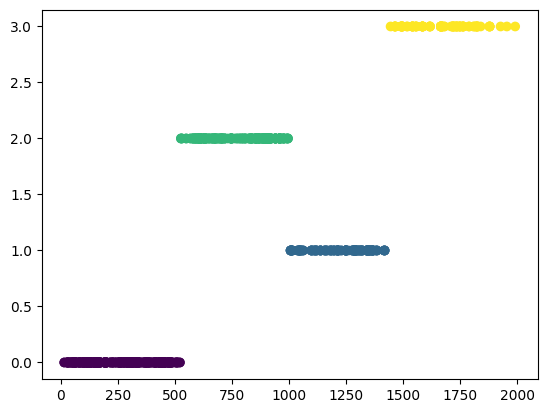

In [11]:
import matplotlib.pyplot as plt
plt.scatter(data['TotalValue'], data['Cluster'], c=data['Cluster'])
plt.show()